In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,log_loss
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Simulation of some data
np.random.seed (245)
nobs =1000
x1= np.random.normal(size=nobs ,scale=1) # ich definiere normal verteilte x1 
x2= np.random.normal(size=nobs ,scale=1) # auch x2 ist normalverteilt
x3= np.random.normal(size=nobs ,scale=1) # auch x3 ist normalverteilt
X= np.c_[np.ones((nobs ,1)),x1,x2,x3] # dann mache ich aus x1,x2, x3 ein Matrix X


y= -1.5 + -0.5*x1**2 -0.5*x2**2 +0.25*x3**2 + np.random.normal(size=nobs , scale=1) # fehler ist normalverteilt-> y auch ist normalverteilt



OLS=sm.OLS(y,X).fit()
y_pred_OLS=OLS.predict(X)

In [3]:
X[:,0:5]

array([[ 1.        , -0.23276742,  2.21909962, -1.00408117],
       [ 1.        ,  0.81853041,  0.51334014,  0.86191678],
       [ 1.        , -0.97334932, -3.00031139,  0.86598633],
       ...,
       [ 1.        ,  1.62168608, -0.91076001, -0.60039352],
       [ 1.        , -0.18710805,  0.74539444, -0.31463947],
       [ 1.        , -1.39579166, -1.03862314,  0.32594296]])

In [4]:
y[0:5]

array([-5.14038861, -1.56918942, -5.63452662, -1.37463074, -1.13933778])

(array([  3.,  14.,  34., 100., 212., 281., 256.,  81.,  15.,   4.]),
 array([-7.86412286, -6.83753031, -5.81093776, -4.78434521, -3.75775266,
        -2.73116011, -1.70456756, -0.67797501,  0.34861754,  1.3752101 ,
         2.40180265]),
 <a list of 10 Patch objects>)

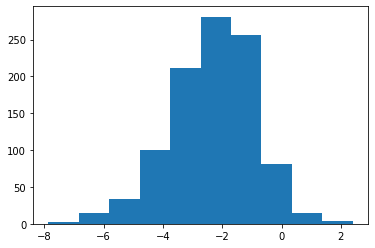

In [5]:
plt.hist(y) # y auch normalverteilt

## OLS Regression

In [6]:
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.208
Date:                Thu, 06 Feb 2020   Prob (F-statistic):              0.306
Time:                        13:18:15   Log-Likelihood:                -1776.1
No. Observations:                1000   AIC:                             3560.
Df Residuals:                     996   BIC:                             3580.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3196      0.045    -51.122      0.0

## The Neural Network

### Hyper parameters

In [7]:
#Learningrate
LR=0.05


# Number of neurons
Neuron_Out=1
Neuron_Hidden=50 # New!

#The Activation function -> لسا الوضع لينيار وماني مستخدم شي جديد
Activate='linear'


#The Optimizer
Optimizer= SGD(lr=LR)


# The loss function
loss='mean_squared_error'

### Construct the Neural Network

In [8]:
## Neural Network
from tensorflow import set_random_seed
set_random_seed (245)

#Initialize the ANN
model_ANN= Sequential()

# Hidden Lyern -> hier wird Hidden Layer definiert-> Anzahl der Neuronen hier sind 50
model_ANN.add(Dense(Neuron_Hidden, activation=Activate, input_shape=(4,), use_bias=False))

#Output Layer -> hier wird Output-Layer defniniert
model_ANN.add(Dense(Neuron_Out, activation=Activate,use_bias=False))
model_ANN.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 50        
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 200 Parameter/Gewichte in Hidden-Layer -> von jedem x/Input-Neuron zu jedem Hidden-Layer-Neuron habe ich ein Verbindung!
# 50 Parameter/Gewichte in Output-Layer -> von jedem Hidden-Layer-Neuron zu einer Output-Neuron

# je mehr Parameter desto mehr sollte ich schätzen-> desto komplexer wird für mein Optimierer dieses Modell zu schätzen->aber ich wird flexibler-> aber flexibilität führt zu Overfitting!
# also je mehr Gewichte ich habe, desto großer ist das Gefahr von Overfitting!

### Compile the Neural Network

In [9]:
model_ANN.compile(optimizer=Optimizer , loss=loss)

### Fit the Neural Network

In [10]:
#Fit the model
history_ANN=model_ANN.fit(
X, # training data
y, # training targets
epochs=500,verbose=1)



Epoch 1/500
1000/1000 [==============================] - 1s 1ms/step - loss: 2.4098
Epoch 2/500
1000/1000 [==============================] - 0s 63us/step - loss: 2.1589
Epoch 3/500
1000/1000 [==============================] - 0s 57us/step - loss: 2.1738
Epoch 4/500
1000/1000 [==============================] - 0s 52us/step - loss: 2.1936
Epoch 5/500
1000/1000 [==============================] - 0s 58us/step - loss: 2.1201
Epoch 6/500
1000/1000 [==============================] - 0s 52us/step - loss: 2.1360
Epoch 7/500
1000/1000 [==============================] - 0s 51us/step - loss: 2.1687
Epoch 8/500
1000/1000 [==============================] - 0s 57us/step - loss: 2.1202
Epoch 9/500
1000/1000 [==============================] - 0s 53us/step - loss: 2.1033
Epoch 10/500
1000/1000 [==============================] - 0s 52us/step - loss: 2.1084
Epoch 11/500
1000/1000 [==============================] - 0s 51us/step - loss: 2.0952
Epoch 12/500
1000/1000 [==============================] - 0s 5

1000/1000 [==============================] - 0s 50us/step - loss: 2.1079
Epoch 186/500
1000/1000 [==============================] - 0s 50us/step - loss: 2.0992
Epoch 187/500
1000/1000 [==============================] - 0s 47us/step - loss: 2.1044
Epoch 188/500
1000/1000 [==============================] - 0s 48us/step - loss: 2.0954
Epoch 189/500
1000/1000 [==============================] - 0s 51us/step - loss: 2.1454
Epoch 190/500
1000/1000 [==============================] - 0s 51us/step - loss: 2.0979
Epoch 191/500
1000/1000 [==============================] - 0s 50us/step - loss: 2.1197
Epoch 192/500
1000/1000 [==============================] - 0s 52us/step - loss: 2.0914
Epoch 193/500
1000/1000 [==============================] - 0s 49us/step - loss: 2.0775
Epoch 194/500
1000/1000 [==============================] - 0s 56us/step - loss: 2.0986
Epoch 195/500
1000/1000 [==============================] - 0s 58us/step - loss: 2.1144
Epoch 196/500
1000/1000 [==============================] 

1000/1000 [==============================] - 0s 64us/step - loss: 2.1203
Epoch 374/500
1000/1000 [==============================] - 0s 63us/step - loss: 2.1061
Epoch 375/500
1000/1000 [==============================] - 0s 63us/step - loss: 2.0883
Epoch 376/500
1000/1000 [==============================] - 0s 63us/step - loss: 2.0818
Epoch 377/500
1000/1000 [==============================] - 0s 60us/step - loss: 2.0989
Epoch 378/500
1000/1000 [==============================] - 0s 64us/step - loss: 2.1261
Epoch 379/500
1000/1000 [==============================] - 0s 58us/step - loss: 2.0900
Epoch 380/500
1000/1000 [==============================] - 0s 51us/step - loss: 2.0936
Epoch 381/500
1000/1000 [==============================] - 0s 49us/step - loss: 2.0880
Epoch 382/500
1000/1000 [==============================] - 0s 53us/step - loss: 2.1188
Epoch 383/500
1000/1000 [==============================] - 0s 48us/step - loss: 2.1108
Epoch 384/500
1000/1000 [==============================] 

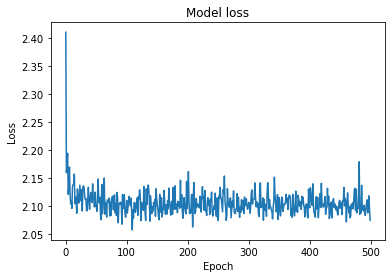

In [11]:
plt.plot(history_ANN.history['loss'])
#plt.plot(history_ANN.history['val_acc'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [12]:
# constant to 50 weights اسع صراحة ما اعرف ليش بي اوزان هون بس على ما اعتقد انه اعتبره اكس صفر
print('Weights connecting the constant to 50 Neurons in the Hidden layer \n\n',model_ANN.layers[0].get_weights()[0][0])

Weights connecting the constant to 50 Neurons in the Hidden layer 

 [ 0.10780312  0.17237863 -0.09808438  0.5631953  -0.01460823 -0.55059725
  0.3342203  -0.05902416  0.12056092 -0.14392516  0.59019125  0.40899682
 -0.19639093 -0.32453176 -0.21745841  0.30552143 -0.16954453 -0.43999842
  0.53984505 -0.4855369  -0.08452999 -0.01204138 -0.0790252   0.3284002
 -0.03498581  0.01474908 -0.30875486 -0.47183597 -0.4807888  -0.3124229
  0.31249616  0.20423101  0.22296396 -0.00349152  0.16550757 -0.1933137
 -0.17515203 -0.13692336 -0.36310893 -0.13755311  0.08860493 -0.61538863
  0.61626107 -0.4623279  -0.12905143  0.28714135 -0.0141036  -0.29997152
 -0.47936907 -0.28458828]


In [13]:
print('Weights connecting X1 to 50 Neurons in the Hidden layer \n\n',model_ANN.layers[0].get_weights()[0][1])

Weights connecting X1 to 50 Neurons in the Hidden layer 

 [ 0.00330912  0.00526298 -0.00298354  0.01713682 -0.00046795 -0.01670622
  0.01016697 -0.00177272  0.00366362 -0.00438308  0.01794887  0.01244491
 -0.0059621  -0.00986199 -0.00661367  0.00928996 -0.00514982 -0.01335375
  0.01638457 -0.01475579 -0.00260334 -0.0003561  -0.00241495  0.01000733
 -0.00104932  0.00044884 -0.00937922 -0.01433839 -0.01461548 -0.00951863
  0.00949868  0.00620357  0.00676924 -0.00012644  0.00499764 -0.00589307
 -0.00532174 -0.00416998 -0.01102174 -0.00418214  0.00268739 -0.01871984
  0.01873489 -0.01405787 -0.00391267  0.00873546 -0.00041502 -0.00915779
 -0.01456946 -0.0086231 ]


In [14]:
print('Weights connecting X2 to 50 Neurons in the Hidden layer \n\n',model_ANN.layers[0].get_weights()[0][2])

Weights connecting X2 to 50 Neurons in the Hidden layer 

 [ 5.20216243e-04  8.50021548e-04 -4.79360373e-04  2.87967175e-03
 -3.70229500e-05 -2.84979912e-03  1.69954228e-03 -3.39288381e-04
  6.13583950e-04 -7.38595263e-04  3.00738495e-03  2.06576078e-03
 -1.02611911e-03 -1.67427398e-03 -1.13013410e-03  1.56091468e-03
 -8.79420666e-04 -2.27207807e-03  2.79395562e-03 -2.49038800e-03
 -3.94430535e-04 -7.74345244e-05 -3.76822194e-04  1.63995533e-03
 -1.80443036e-04  8.20917703e-05 -1.56523241e-03 -2.40005110e-03
 -2.46144412e-03 -1.57422433e-03  1.58518972e-03  1.04623428e-03
  1.15086883e-03 -1.36400795e-05  8.86314316e-04 -9.77880554e-04
 -8.84596724e-04 -7.16112554e-04 -1.89309893e-03 -7.07058469e-04
  4.66750003e-04 -3.13057750e-03  3.14633199e-03 -2.33527482e-03
 -6.56468037e-04  1.43537868e-03 -9.68872773e-05 -1.48664031e-03
 -2.45382148e-03 -1.47549214e-03]


In [15]:
print('Weights connecting X3 to 50 Neurons in the Hidden layer \n\n',model_ANN.layers[0].get_weights()[0][1])

Weights connecting X3 to 50 Neurons in the Hidden layer 

 [ 0.00330912  0.00526298 -0.00298354  0.01713682 -0.00046795 -0.01670622
  0.01016697 -0.00177272  0.00366362 -0.00438308  0.01794887  0.01244491
 -0.0059621  -0.00986199 -0.00661367  0.00928996 -0.00514982 -0.01335375
  0.01638457 -0.01475579 -0.00260334 -0.0003561  -0.00241495  0.01000733
 -0.00104932  0.00044884 -0.00937922 -0.01433839 -0.01461548 -0.00951863
  0.00949868  0.00620357  0.00676924 -0.00012644  0.00499764 -0.00589307
 -0.00532174 -0.00416998 -0.01102174 -0.00418214  0.00268739 -0.01871984
  0.01873489 -0.01405787 -0.00391267  0.00873546 -0.00041502 -0.00915779
 -0.01456946 -0.0086231 ]


In [102]:
print('Weights connecting the 50 Neurons in the Hidden layer to the Output layer\n\n',model_ANN.layers[1].get_weights()[0])

Weights connecting the 50 Neurons in the Hidden layer to the Output layer

 [[-0.04385008]
 [-0.07870575]
 [ 0.05027489]
 [-0.26310757]
 [ 0.00808061]
 [ 0.2607215 ]
 [-0.16032158]
 [ 0.02395622]
 [-0.06069269]
 [ 0.0732206 ]
 [-0.2826032 ]
 [-0.19719723]
 [ 0.08530917]
 [ 0.14965121]
 [ 0.09763848]
 [-0.14345676]
 [ 0.08257897]
 [ 0.2116947 ]
 [-0.25770804]
 [ 0.23310295]
 [ 0.03846983]
 [ 0.00098558]
 [ 0.03822497]
 [-0.15884042]
 [ 0.01633594]
 [-0.00790868]
 [ 0.1448694 ]
 [ 0.23039454]
 [ 0.23191226]
 [ 0.14860241]
 [-0.14710839]
 [-0.09208874]
 [-0.10086777]
 [-0.0013786 ]
 [-0.08391085]
 [ 0.09647486]
 [ 0.07743942]
 [ 0.06296962]
 [ 0.16529366]
 [ 0.06659525]
 [-0.04419359]
 [ 0.29384282]
 [-0.29325542]
 [ 0.22078553]
 [ 0.06075438]
 [-0.13826182]
 [-0.00131266]
 [ 0.14871062]
 [ 0.22400396]
 [ 0.13924284]]


In [16]:
#Evaluate the fit
y_pred_ANN=model_ANN.predict(X)
print("MSE ANN:", mean_squared_error(np.ravel(y), np.ravel(y_pred_ANN ))) 
print("MSE OLS:", mean_squared_error(np.ravel(y), np.ravel(y_pred_OLS )))

MSE ANN: 2.065602762885204
MSE OLS: 2.0428623165804765


### Mean sequared error in NN ist schlechter als Mean sequared error in OLS, obwohl ich mein Modell in NN komplexer gemacht habe!
### was ist der Grund dazu? -> ich habe Modell je komplexer gemacht aber die Verbindung zwischen Input x und Output y ist  noch Linear! weil Aktivierungsfunktion in Hidden-Layer-Neurons 'linear' ist! 

# Sehe Beispiel auf Papier!